# Customer segmentation with unsupervised learning

## Loading the datatsets and importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [2]:
data = pd.read_csv('customer_segmentation_2.csv')

In [3]:
data.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [4]:
data.tail()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
29995,10235,29995,4,0.0,5,10,5.80,0.0,51.30,0.00,0.0,0.0,0.0,42.9
29996,10236,29996,1,0.0,7,21,0.00,0.0,0.00,0.00,100.0,0.0,0.0,0.0
29997,10237,29997,54,0.0,4,17,9.25,0.0,77.48,13.27,0.0,0.0,0.0,0.0
29998,10237,29998,10,0.0,5,10,0.00,0.0,100.00,0.00,0.0,0.0,0.0,0.0
29999,10238,29999,2,0.0,4,17,0.00,0.0,0.00,0.00,0.0,0.0,100.0,0.0


In [5]:
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Data Cleaning

In [15]:
unique_customer = data.drop_duplicates('customer') # if any duplicates are present than they will be drop

In [16]:
unique_customer = unique_customer.set_index('customer')
unique_customer

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders
customer,,,,,,,,,,,,,,
0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0,3.0
1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0,20.0
2,23,26,2.97,6,23,24.10,22.29,38.69,14.92,0.00,0.00,0.0,0.0,1.0
3,24,28,2.21,1,10,36.51,31.93,27.18,4.38,0.00,0.00,0.0,0.0,23.0
4,47,23,0.65,3,9,8.23,82.63,9.14,0.00,0.00,0.00,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,29994,1,0.00,4,16,0.00,0.00,0.00,0.00,0.00,0.00,100.0,0.0,1.0
10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9,1.0
10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0,1.0


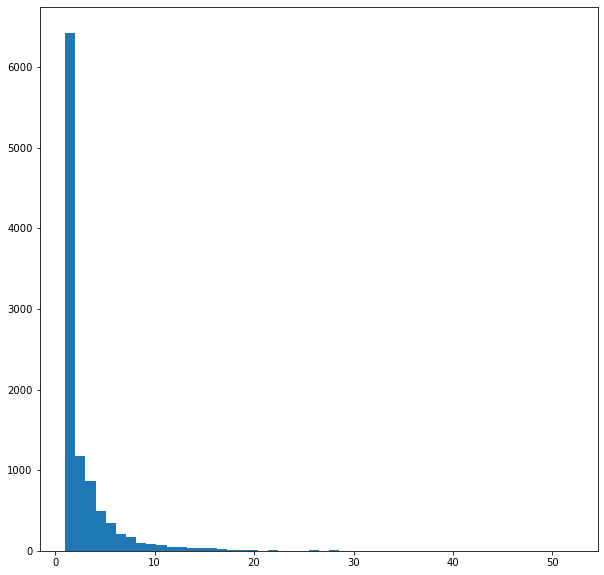

There are 10239 unique customers in the dataset of 30000 orders


1     4479
2     1944
3     1180
4      862
5      492
6      351
7      204
8      174
9       99
10      82
11      74
12      51
13      49
15      40
14      40
16      32
17      28
19      12
18      12
26       5
20       5
28       4
22       4
23       3
21       2
24       2
25       2
29       2
40       1
52       1
37       1
36       1
31       1
Name: order, dtype: int64

In [8]:
customer_pivot = pd.pivot_table(data , values='order', index='customer', aggfunc='count')
plt.figure(figsize=(10,10))
plt.hist(customer_pivot['order'], bins=50)
#plt.xlim(0, 105)
plt.show()
msg = "There are %d unique customers in the dataset of %d orders" % (len(customer_pivot), len(data))
print(msg)
customer_pivot.order.value_counts()

The number of orders per customer has an exponential distribution, 
with about 44% of customers having just one order in the dataset

In [9]:
# Add product category percentages as a check
data['Total%'] = data['Food%'] + data['Fresh%'] + data['Drinks%'] + data['Home%'] + data['Beauty%'] + data['Health%'] + data['Baby%'] + data['Pets%']
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,Total%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087,99.841636
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390,1.886816
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.220000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000,100.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000,100.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,107.220000


In [10]:
# Examine outliers
customer_check = data[(data['Total%']<99.0) | (data['Total%']>101)]
msg = "There are %d potential outliers in the dataset of %d samples" % (len(customer_check), len(data))
print(msg)

There are 416 potential outliers in the dataset of 30000 samples


Since there are only 416 potential outliers in Total%, we will delete them from the dataset.

In [11]:
#Remove records that may have errors in the product category percentages
customer = data[(data['Total%']>=99.0) & (data['Total%']<=101)]

In [12]:
freebies = len(data[(data['discount%']==100.0)])
#print("There are "  freebies " samples with 100% discount.")
msg = "There are %d samples with 100 percent discount." % freebies
print(msg)

recharge = len(data[(data['discount%']<0)])
#print("There are "  freebies " samples with 100% discount.")
msg = "There are %d samples with negative discount." % recharge
print(msg)

#Remove records that have 100% discount
customer = data[(data['discount%']!=100.0)]

There are 396 samples with 100 percent discount.
There are 126 samples with negative discount.


## Exploratory Data Analysis

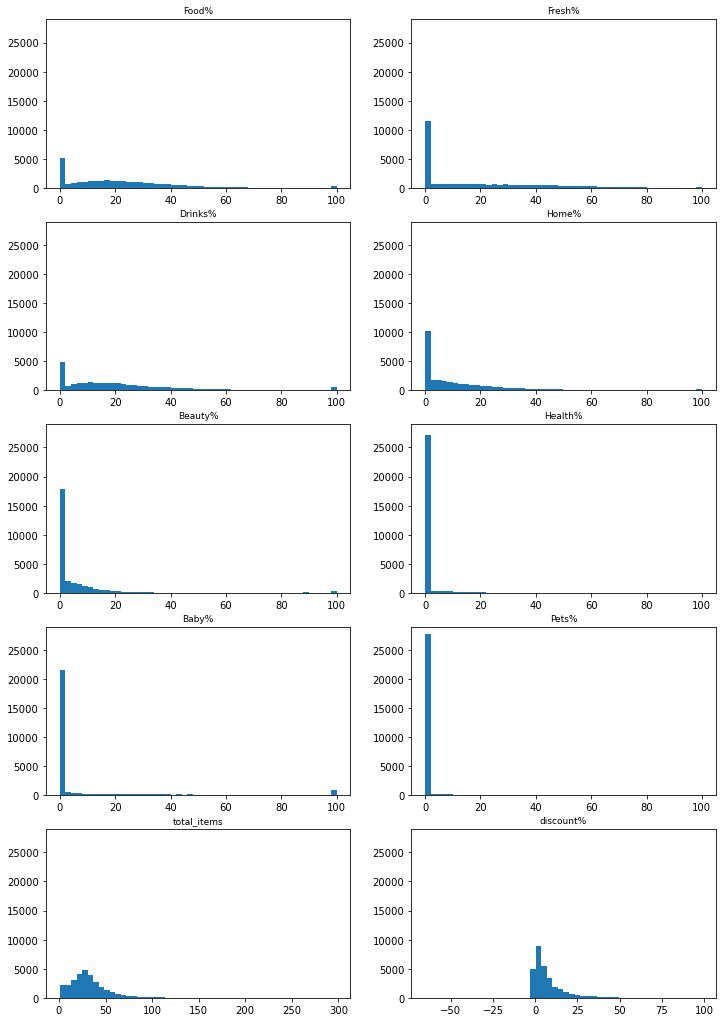

In [13]:
# Review distributions of potential predictor variables
prod = customer[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%',
            'total_items', 'discount%']]

fig = plt.figure()

num=1
for column in prod:
    # Find the right spot on the plot
    ax = plt.subplot(5, 2, num)
    fig.set_size_inches(12, 18, forward=True)
    
    plot_var = customer[column]
    plt.hist(plot_var, bins=50)
    #sns.kdeplot(plot_var, shade=True, linewidth=1, legend=False, color='g') #
    title = column #+ "(log): " + v_normal
    plt.title(title, fontsize=9)
    ax.set_ylim(0, 29000)
   
    num+=1
      
plt.show()      

These histograms have the same y axis to show that for several categories (Beauty, Health, Baby, and Pets) most orders do not contain any products from those categories. Zero percent is the mode for all of the product categories. This data is difficult to transform to Gaussian approximation. Therefore I will instead dichotomize these measures into dummy variable that indicate whether or not the category was prsent in the order.

In [14]:
# Create dataset for transformed features
customer_tran = customer.copy()
min_disc = np.min(customer_tran['discount%'])
customer_tran['discount%'] = customer_tran['discount%'] - min_disc

In [15]:
# Create dummy product category indicators
prod = ['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']
names = ['Food', 'Fresh', 'Drinks', 'Home', 'Beauty', 'Health', 'Baby', 'Pets']
for index in range(len(prod)):
    customer_tran[names[index]] = (customer_tran[prod[index]]>0).astype(int)

In [16]:
customer_tran['cat_count'] = customer_tran['Food'] + customer_tran['Fresh'] + customer_tran['Drinks'] + customer_tran['Home'] + customer_tran['Beauty'] + customer_tran['Health'] + customer_tran['Baby'] + customer_tran['Pets']

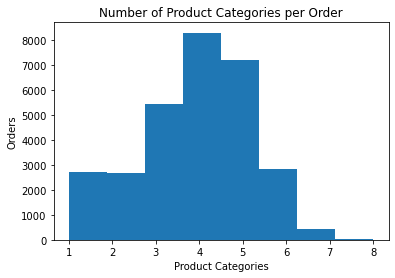

In [17]:
plt.hist(customer_tran.cat_count, bins=8)
plt.title("Number of Product Categories per Order")
plt.xlabel("Product Categories")
plt.ylabel("Orders")
plt.show()

The number of product categories represented in individual orders is distributed fairly normally, although single-category orders are overrepresented.

In [18]:
#Save identifier and numeric columns for later
customer_id = customer_tran[['order', 'customer', 'hour', 'total_items', 'discount%', 'cat_count']]

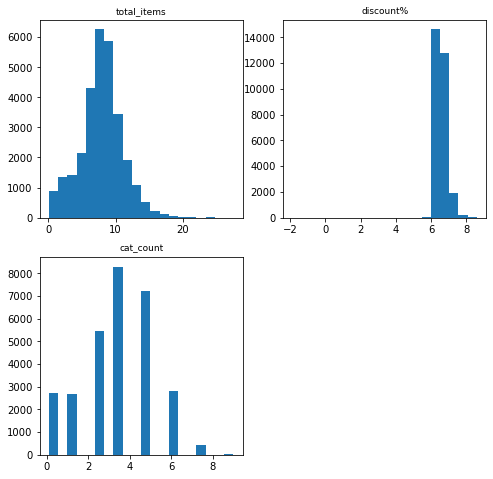

In [19]:
# Transform all the numeric columns in input data, due to skewness
from scipy.stats import boxcox

vars = ['total_items', 'discount%', 'cat_count']

fig = plt.figure()

num=1
for col in vars:
    # use boxcox square root
    customer_tran[col] = boxcox(customer_tran[col] + 0.1)[0]
    
    plt.subplot(2, 2, num)
    fig.set_size_inches(8, 8, forward=True)
    
    plot_var = customer_tran[col]
    plt.hist(plot_var, bins=20)
    #sns.kdeplot(plot_var, shade=True, linewidth=1, legend=False, color='g') #
    title = col 
    plt.title(title, fontsize=9)
    
    num+=1
      
plt.show()      
 

Above are the transformed numeric features. Next we will explore the time and day features of the dataset.

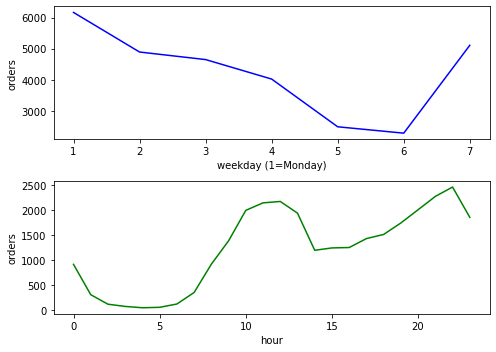

In [20]:
#Plot orders over time

days = pd.pivot_table(customer, values='order', index='weekday', aggfunc='count')
hours = pd.pivot_table(customer, values='order', index='hour', aggfunc='count')
fig, axs = plt.subplots(2, 1, figsize=(7, 5))
axs[0].plot(days['order'], 'b')
axs[0].set_xlabel("weekday (1=Monday)")
axs[0].set_ylabel("orders")
axs[1].plot(hours['order'], 'g')
axs[1].set_xlabel("hour")
axs[1].set_ylabel("orders")
fig.tight_layout()
#fig.suptitle('Number of Orders by Day and Hour')
plt.show()

In this dataset 1=Monday and 7=Sunday, so we can see that the most orders occur on Monday and Sunday while orders are much lower on Friday and Saturday. The most popular time for ordering is between 10-11pm, followed by 10am-noon.

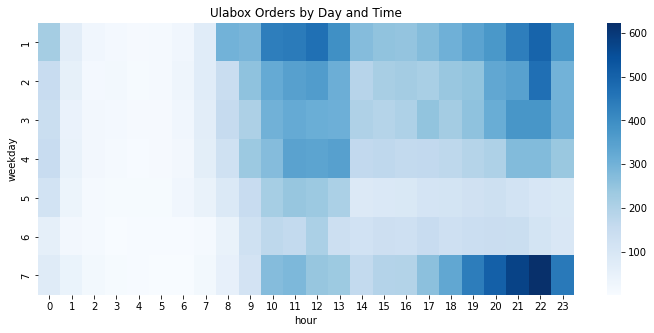

In [21]:
heatmap = pd.pivot_table(customer, values='order', index='weekday', columns='hour', aggfunc='count')

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
#plt.gca().invert_yaxis()
#plt.ylim(1999, 2016) 
plt.title('Ulabox Orders by Day and Time') 
sns.heatmap(heatmap, cmap = 'Blues')
#ax.set_xlabel('Counties (Sorted by Mean Drug Mortality)')
ax = plt.gca()
plt.show()

This heatmap shows that most of the late evening orders are placed on Sunday. Overall, Sunday evening and Monday midday are the most common times for orders to be placed.

## Data Preparation

In [17]:
no_orders = data['customer'].value_counts()

In [20]:
for i in range(data.shape[0]):
    data.loc[i, 'num_orders'] = no_orders[data.loc[i, 'customer']]

In [21]:
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087,6.327067
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390,5.970311
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000,8.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.000000


We are replacing Food%, Fresh% etc. of customers with the average among all the orders and adding an extra feature called number_orders.

In [22]:
customer_avg = data[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%','customer']].groupby('customer').mean()
customer_avg

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
customer,,,,,,,,,,
0,44.666667,14.110000,14.070000,73.203333,4.356667,6.200000,2.176667,0.000,0.000000,0.0
1,31.150000,17.849000,17.762000,52.909000,17.761000,3.207500,2.314500,4.352,1.695000,0.0
2,26.000000,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0
3,27.782609,4.102174,23.825652,51.280870,8.220870,14.773478,0.000000,0.000,1.898696,0.0
4,17.103448,4.373103,24.841379,51.082414,10.291034,13.035172,0.683793,0.000,0.065517,0.0
...,...,...,...,...,...,...,...,...,...,...
10234,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,100.000000,0.0
10235,4.000000,0.000000,5.800000,0.000000,51.300000,0.000000,0.000000,0.000,0.000000,42.9
10236,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000,0.000000,0.0


In [23]:
# If the customer are same and present in two or more different rows than with this code rows will group within 1 row and 
# values will replaced by mean of the same customers column values 
unique_customer[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']] = customer_avg

In [24]:
unique_customer.head()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders
customer,,,,,,,,,,,,,,
0,0,44.666667,14.110000,4,13,14.070000,73.203333,4.356667,6.200000,2.176667,0.000,0.000000,0.0,3.0
1,3,31.150000,17.849000,1,12,17.762000,52.909000,17.761000,3.207500,2.314500,4.352,1.695000,0.0,20.0
2,23,26.000000,2.970000,6,23,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0,1.0
3,24,27.782609,4.102174,1,10,23.825652,51.280870,8.220870,14.773478,0.000000,0.000,1.898696,0.0,23.0
4,47,17.103448,4.373103,3,9,24.841379,51.082414,10.291034,13.035172,0.683793,0.000,0.065517,0.0,29.0


### Order Segmentation

let's try and find if there are any clusters among the orders that customers made.

There may not be any relevant information in the hour in which they ordered but the weekday in which they ordered may reveal some information about weekend buyers.

Let's remove customer, order and hour features from the data

In [25]:
df = unique_customer.drop(['order', 'hour', 'weekday'], axis=1)
df

,total_items,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders
customer,,,,,,,,,,,
0,44.666667,14.110000,14.070000,73.203333,4.356667,6.200000,2.176667,0.000,0.000000,0.0,3.0
1,31.150000,17.849000,17.762000,52.909000,17.761000,3.207500,2.314500,4.352,1.695000,0.0,20.0
2,26.000000,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0,1.0
3,27.782609,4.102174,23.825652,51.280870,8.220870,14.773478,0.000000,0.000,1.898696,0.0,23.0
4,17.103448,4.373103,24.841379,51.082414,10.291034,13.035172,0.683793,0.000,0.065517,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...
10234,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,100.000000,0.0,1.0
10235,4.000000,0.000000,5.800000,0.000000,51.300000,0.000000,0.000000,0.000,0.000000,42.9,1.0
10236,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000,0.000000,0.0,1.0


Let's try and do pca and t-sne of the features and see the explained variance and plots

In [26]:
from sklearn.decomposition import PCA 
# PCA(Principal Component Analysis) one of the most known dimensionality reduction “unsupervised” algorithm  

In [27]:
pca = PCA(n_components=10)
pca.fit(df.values)

PCA(n_components=10)

<Figure size 1440x1440 with 0 Axes>

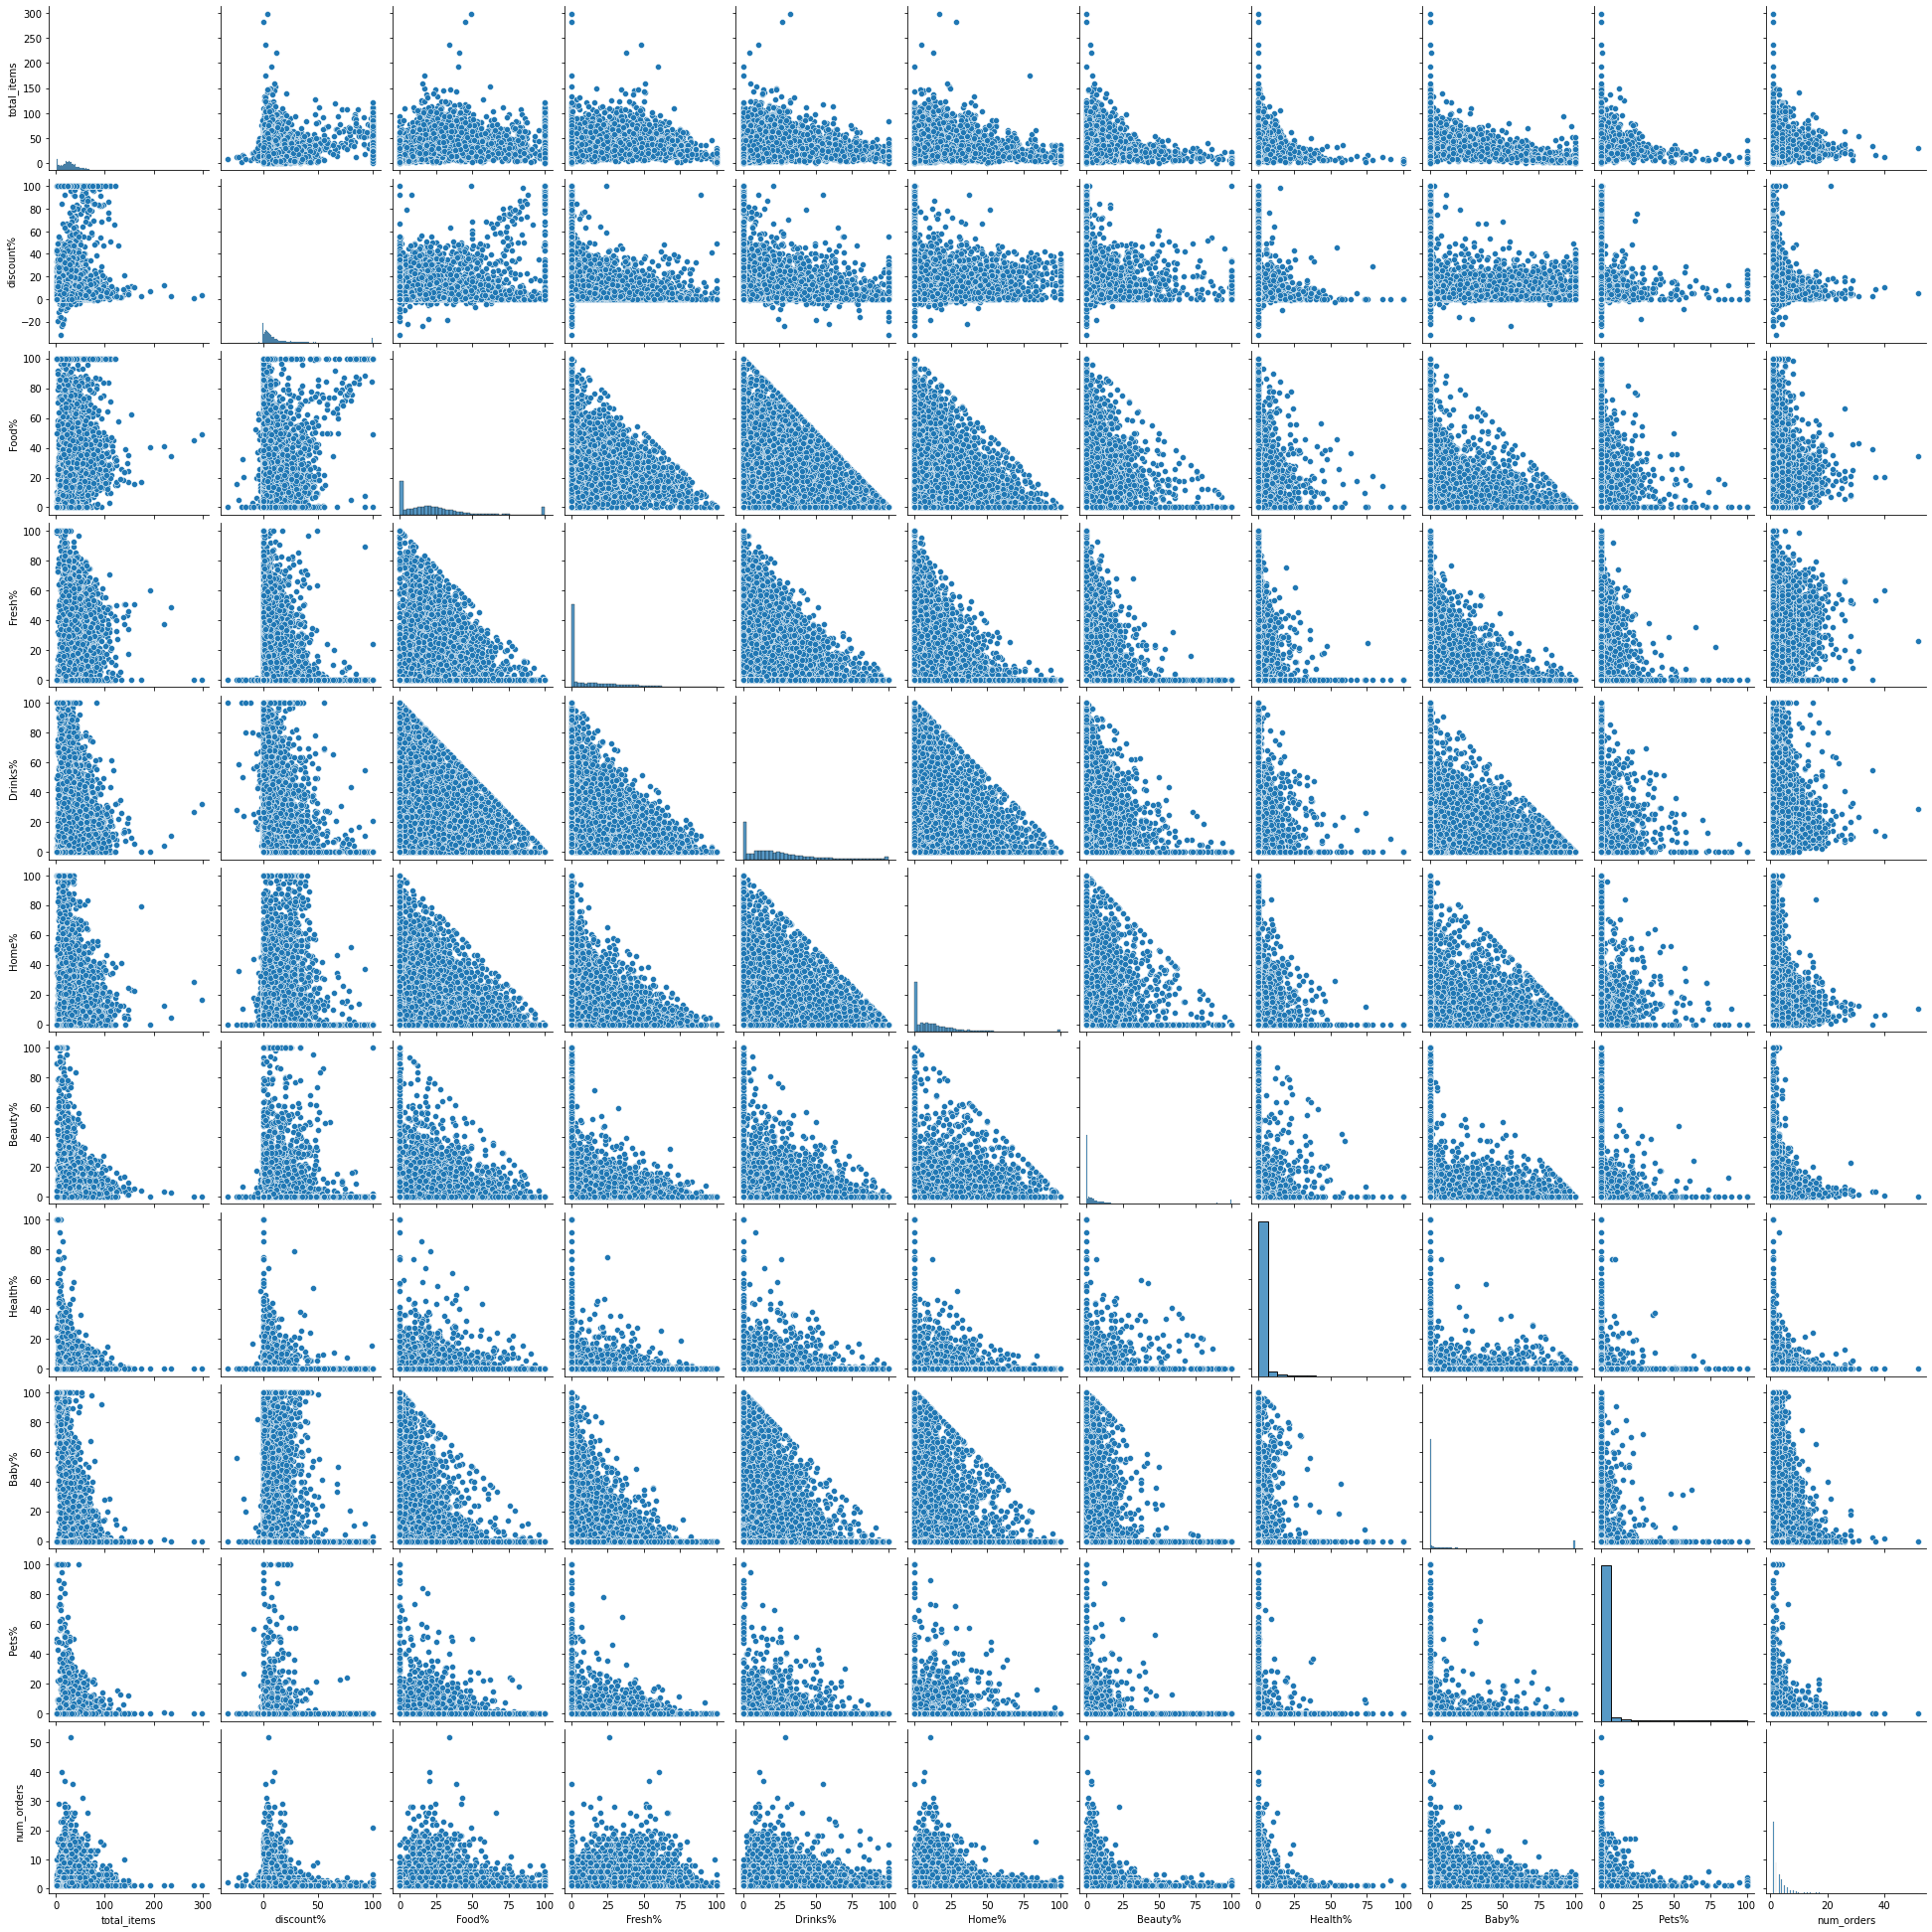

In [28]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

In [29]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [30]:
dependant_variable_detector(df) 
# An R-Squared(R2) above 0.7 would generally be seen as showing a high level of correlation, 
# whereas a measure below 0.4 would show a low correlation.

Using total_items as dependent variable R2 score is :0.2721532836034287
Using discount% as dependent variable R2 score is :0.30395782977173735
Using Food% as dependent variable R2 score is :0.9914935858513226
Using Fresh% as dependent variable R2 score is :0.9868559613586136
Using Drinks% as dependent variable R2 score is :0.9898374751166672
Using Home% as dependent variable R2 score is :0.9852675174491302
Using Beauty% as dependent variable R2 score is :0.9866629058932479
Using Health% as dependent variable R2 score is :0.8483262198492896
Using Baby% as dependent variable R2 score is :0.9936921090049888
Using Pets% as dependent variable R2 score is :0.8985131646915558
Using num_orders as dependent variable R2 score is :0.10669825172834557


In [31]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

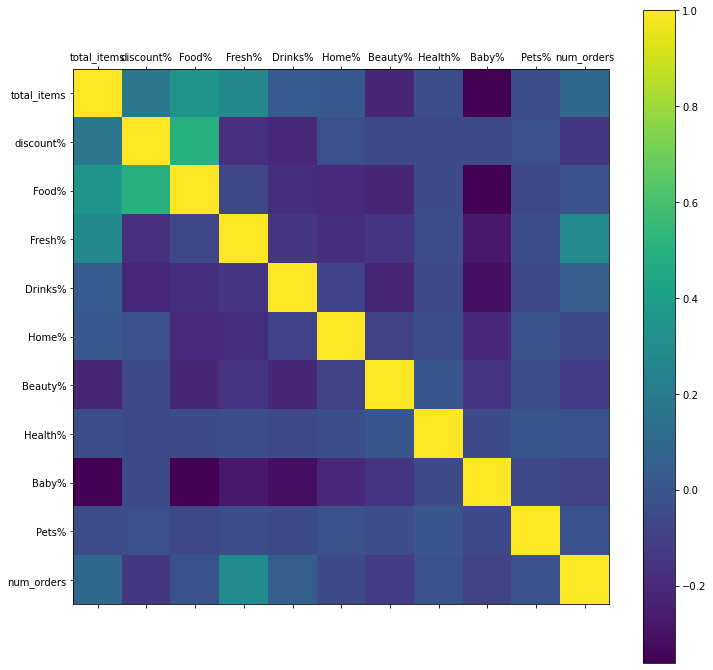

In [32]:
plot_corr_matrix(df) # This show that discount% and Food% show some correlation but other than this correlation with other columns are low

## Are there clusters in the data, how many clusters?

In [33]:
from sklearn.cluster import KMeans

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X = scaler.fit_transform(df.values)

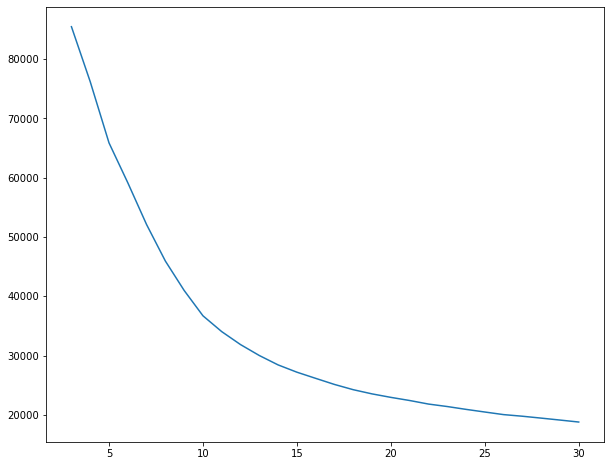

In [36]:
# Elbow method:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 3 to 31 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
5. Here, the optimal number of clusters would be 10 because at 10 there is bend in the plot 

In [37]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2) #n_neighbors is number of neighbors to use by default for kneighbors queries.
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1] # find the K-neighbors of a point
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist) #Calculate the Hopkins statistic (H) as the mean nearest neighbor 
                                                       #distance in the random data set divided by the sum of the mean nearest 
                                                       #neighbor distances in the real and across the simulated data set.
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [38]:
hopkins_statistic(df)
# A value close to 1 tends to indicate the data is highly clustered, 
# random data will tend to result in values around 0.5, and
# uniformly distributed data will tend to result in values close to 0.

------------2559------------
*************************
hopkins statistic :0.5629464991764941
*************************
hopkins statistic :0.5652752207656321
*************************
hopkins statistic :0.5628567213499948
*************************
hopkins statistic :0.5606352425185804
*************************
hopkins statistic :0.5577610929818865
mean hopkins statistic :0.5618949553585175
hopkins statistic standard deviation :0.0025350592511438597
------------5119------------
*************************
hopkins statistic :0.5460183303312831
*************************
hopkins statistic :0.549708333260147
*************************
hopkins statistic :0.5505235918544903
*************************
hopkins statistic :0.5462626787295023
*************************
hopkins statistic :0.5431421196816122
mean hopkins statistic :0.547131010771407
hopkins statistic standard deviation :0.0026853494386890027
------------7679------------
*************************
hopkins statistic :0.5424480326414121
*****

Not a great hopkins statistic score

In [39]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = [] # The silhouette_score gives the average value for all the samples.
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

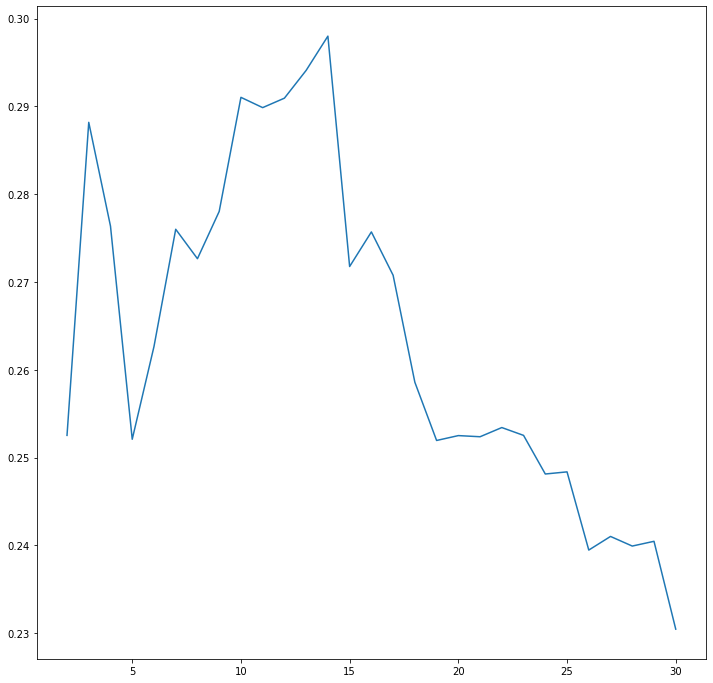

In [40]:
plot_silhoutte_score(X,30) 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other 
clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched 
to its own cluster and poorly matched to neighboring clusters. And around 10 number of cluster  its shows highest value of sil_score

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### Clustering and Interpretation

In [43]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
unique_customer['labels'] = kmeans_10.predict(X)

In [45]:
unique_customer[unique_customer['labels']==0]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
customer,,,,,,,,,,,,,,,
34,186,27.000000,25.950000,1,12,22.270000,0.000000,51.860000,6.150000,0.000000,19.720000,0.0,0.0,1.0,0
38,195,23.666667,0.336667,4,12,17.540000,9.273333,56.716667,13.460000,3.010000,0.000000,0.0,0.0,3.0,0
45,220,19.333333,1.810000,1,14,7.506667,3.810000,56.563333,8.976667,14.426667,8.713333,0.0,0.0,3.0,0
47,224,39.000000,1.090000,7,18,15.040000,18.390000,45.890000,17.330000,3.350000,0.000000,0.0,0.0,1.0,0
50,248,31.166667,10.475000,7,12,20.966667,16.063333,54.378333,5.233333,2.111667,1.248333,0.0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,29852,1.000000,0.000000,3,10,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0
10189,29887,8.000000,6.820000,3,16,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0
10205,29936,22.000000,13.430000,3,20,12.040000,0.000000,47.670000,0.000000,40.280000,0.000000,0.0,0.0,1.0,0


In [46]:
unique_customer[unique_customer['labels']==0].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.00000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.0
mean,15499.824575,22.830689,6.573390,3.601236,15.060278,11.998055,4.077836,66.96800,9.506560,3.166554,0.443716,3.114248,0.568804,2.442813,0.0
std,9072.958775,11.588189,8.201953,2.085237,5.475623,11.051670,7.208488,19.02793,10.515453,6.032666,2.022630,8.888659,3.166214,1.740129,0.0
min,186.000000,1.000000,-31.820000,1.000000,0.000000,0.000000,0.000000,33.77000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,7109.750000,15.000000,1.694000,2.000000,12.000000,0.553125,0.000000,51.70950,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,15516.500000,22.000000,4.689000,3.000000,15.000000,10.226250,0.000000,61.57750,6.076000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0
75%,23598.500000,29.000000,8.649375,5.000000,20.000000,19.484583,5.687500,80.66500,16.563000,3.970000,0.000000,0.000000,0.000000,3.000000,0.0
max,29997.000000,84.000000,63.330000,7.000000,23.000000,50.065000,41.650000,100.00000,44.690000,50.000000,19.720000,54.234000,33.080000,14.000000,0.0


-> These are the class of people who buy drinks a lot, let's call them drink_lovers people.<br>
->  This may be for a party or a personal good time.<br>
-> These class of people seem to have placed good number of orders, this a valuable point.<br>
-> Ulaxbox should put shop drink fridge where these class of people are most likely to be seen.<br>

In [82]:
unique_customer.loc[unique_customer['labels']==0, 'class'] = 'drink_lovers'

In [48]:
unique_customer[unique_customer['labels']==1]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
2,23,26.000000,2.9700,6,23,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0,1.0,1,NaN
11,113,46.800000,17.4980,1,11,31.646000,5.224000,4.274000,12.878000,5.016000,3.686,36.898000,0.0,5.0,1,NaN
14,128,33.285714,3.3600,7,22,40.201429,18.102857,12.048571,14.247143,10.541429,0.000,4.855714,0.0,7.0,1,NaN
20,146,48.000000,3.9400,2,9,30.215000,13.690000,21.270000,20.725000,0.000000,7.990,6.115000,0.0,2.0,1,NaN
21,148,19.000000,0.7875,3,20,28.737500,0.000000,30.552500,34.200000,5.642500,0.000,0.867500,0.0,4.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,29957,21.500000,5.1600,4,15,19.805000,16.625000,30.185000,6.845000,0.000000,0.000,26.540000,0.0,2.0,1,NaN
10218,29962,1.000000,3.5800,4,9,100.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,1.0,1,NaN
10221,29969,29.250000,2.8225,4,11,90.752500,0.000000,9.247500,0.000000,0.000000,0.000,0.000000,0.0,4.0,1,NaN


In [49]:
unique_customer[unique_customer['labels']==1].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.0
mean,15256.909414,36.512029,7.835666,3.675186,15.395341,38.833252,8.604817,23.840753,14.989520,6.472228,1.068718,5.040001,0.943009,2.642834,1.0
std,8959.767250,19.136970,8.248432,2.164429,5.729244,21.973191,9.204189,12.850052,10.570171,8.253675,2.791840,10.563172,3.758810,1.794426,0.0
min,23.000000,1.000000,-18.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,7289.500000,25.000000,2.640000,2.000000,12.000000,23.378750,0.000000,14.965000,6.145000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,15299.000000,33.000000,5.425000,3.000000,16.000000,33.840000,5.450000,24.110000,14.514000,3.910000,0.000000,0.000000,0.000000,2.000000,1.0
75%,23345.500000,45.000000,10.135000,6.000000,20.000000,48.230000,16.275000,33.267500,22.886250,9.326250,0.000000,2.533333,0.000000,4.000000,1.0
max,29988.000000,298.000000,58.275000,7.000000,23.000000,100.000000,33.360000,62.230000,46.326000,56.290000,20.480000,55.020000,31.560000,9.000000,1.0


-> These are again very valuable customers of ulabox.<br>
-> They buy from all the categories and their order counts are pretty impressive.<br>
-> Their order counts are not as impressive as the royal customers, but these are potential customers who has a chance of becoming loyal customers.

In [67]:
unique_customer.loc[unique_customer['labels']==1, 'class'] = 'grocery_regular'

In [50]:
unique_customer[unique_customer['labels']==2]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
100,435,82.25,49.9625,1,21,81.62,0.00,15.8325,1.06,0.0,0.0,1.05,0.0,4.0,2,NaN
341,1248,6.00,42.8600,3,10,100.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,1.0,2,NaN
351,1263,21.00,48.9500,3,9,76.34,15.74,3.9100,4.01,0.0,0.0,0.00,0.0,1.0,2,NaN
1370,4256,6.00,50.0000,2,11,100.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,1.0,2,NaN
1441,4449,22.00,100.0000,4,0,100.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,1.0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,28709,25.00,100.0000,2,20,100.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,1.0,2,NaN
9856,29130,15.50,100.0000,2,20,100.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,2.0,2,NaN
10025,29538,122.00,100.0000,6,20,100.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.0,1.0,2,NaN


In [51]:
unique_customer[unique_customer['labels']==2].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.0
mean,9689.668380,51.236290,93.673402,3.789203,15.421594,96.950735,0.343997,0.878072,0.718702,0.467431,0.111330,0.401371,0.127378,1.213368,2.0
std,6227.139913,23.235057,13.927901,2.061374,4.960374,8.834215,2.155559,3.678003,3.696377,3.110639,1.133136,3.527671,1.681690,0.530732,0.0
min,435.000000,2.000000,35.520000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,5469.000000,32.000000,100.000000,2.000000,12.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
50%,7575.000000,52.000000,100.000000,3.000000,16.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
75%,9647.000000,66.000000,100.000000,6.000000,20.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
max,29792.000000,127.000000,100.000000,7.000000,23.000000,100.000000,24.240000,30.780000,34.410000,50.000000,15.420000,50.000000,24.080000,5.000000,2.0


-> These class of people have bought lots and lots of grocery at lots and lots of discount.<br>
-> Their order counts are fairly low, considering this they have supposedly ordered grocery only during the offer period.<br>
-> With the given data, considering the order count to be very less, whatever marketing strategy ulabox used has failed to stop churning of customers.<br>
-> Let's call these people grocery shoppers, remember they bought products mostly in discount.

In [68]:
unique_customer.loc[unique_customer['labels']==2, 'class'] = 'grocery_shoppers'

In [52]:
unique_customer[unique_customer['labels']==3]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
139,577,1.0,9.640,6,15,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,1.0,3,NaN
196,759,5.0,20.050,3,16,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,1.0,3,NaN
248,932,12.0,2.450,7,13,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,1.0,3,NaN
300,1114,6.0,0.000,3,8,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,1.0,3,NaN
326,1208,10.0,5.300,4,9,11.99,0.0,0.0,0.0,88.010,0.00,0.000,0.0,1.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,29857,1.0,9.640,3,11,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,1.0,3,NaN
10177,29862,7.0,0.000,5,12,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,1.0,3,NaN
10195,29899,4.5,12.500,3,17,0.00,0.0,0.0,0.0,100.000,0.00,0.000,0.0,2.0,3,NaN


In [53]:
unique_customer[unique_customer['labels']==3].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.0
mean,16786.738824,4.888549,7.359727,2.936471,13.496471,1.892879,0.218159,0.893301,1.832329,92.271379,0.458100,0.242647,0.029859,1.101176,3.0
std,8066.458324,6.998211,10.805520,2.031175,5.192121,6.530993,2.073717,4.225768,6.646110,13.310945,2.662514,2.443524,0.615555,0.452064,0.0
min,577.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.830000,0.000000,0.000000,0.000000,1.000000,3.0
25%,11306.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,89.690000,0.000000,0.000000,0.000000,1.000000,3.0
50%,16083.000000,1.000000,4.325000,3.000000,13.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,23270.000000,6.000000,9.640000,4.000000,17.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.000000,3.0
max,29996.000000,40.000000,100.000000,7.000000,23.000000,45.880000,32.030000,43.550000,41.770000,100.000000,22.020000,35.510000,12.690000,5.000000,3.0


-> These are the class of people who buy beauty products a lot, let's call them beauty concious people.<br>
-> These class of people seem to have placed very less number of orders, this a valuable point.<br>
-> ulabox can try for marketing strategies to appeal to these people.<br>
-> A campaigning event where these people get their hands on ordering from ulabox, for which they get some incentive will be a good idea.<br>
-> This should be held in market or a beauty parlour where these people are most likely to be seen.<br>

In [69]:
unique_customer.loc[unique_customer['labels']==3, 'class'] = 'beauty_concious'

In [54]:
unique_customer[unique_customer['labels']==4]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
1,3,31.150000,17.849000,1,12,17.762000,52.909000,17.761000,3.207500,2.314500,4.352000,1.695000,0.000000,20.0,4,NaN
3,24,27.782609,4.102174,1,10,23.825652,51.280870,8.220870,14.773478,0.000000,0.000000,1.898696,0.000000,23.0,4,NaN
4,47,17.103448,4.373103,3,9,24.841379,51.082414,10.291034,13.035172,0.683793,0.000000,0.065517,0.000000,29.0,4,NaN
6,77,40.769231,2.683846,2,12,39.315385,23.766923,19.721538,5.633077,2.188462,0.000000,6.617692,2.756923,13.0,4,NaN
8,91,35.250000,23.670000,2,23,24.091250,37.566250,22.392500,12.033750,3.917500,0.000000,0.000000,0.000000,8.0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033,29567,32.300000,8.904000,4,19,23.656000,37.175000,10.534000,6.180000,2.636000,0.000000,19.820000,0.000000,10.0,4,NaN
10055,29607,27.400000,10.268667,2,11,27.340000,59.024000,7.967333,1.475333,2.262000,0.000000,1.932667,0.000000,15.0,4,NaN
10149,29797,46.125000,18.847500,3,22,12.745000,25.232500,35.188750,19.182500,6.465000,0.000000,1.182500,0.000000,8.0,4,NaN


In [55]:
unique_customer[unique_customer['labels']==4].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.0
mean,14785.910624,32.830398,6.264605,3.482293,14.792580,22.652981,32.705206,20.036895,10.961807,4.012484,1.088167,7.639475,0.813764,12.706577,4.0
std,8325.997515,13.442750,6.461652,2.266108,5.715006,10.237911,18.925930,12.818739,7.697748,3.585639,2.353179,12.036893,2.649831,4.704610,0.0
min,3.000000,2.100000,-0.055217,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.0
25%,8291.000000,24.181818,2.585000,1.000000,11.000000,15.619000,18.619000,11.334444,5.968889,1.542222,0.000000,0.000000,0.000000,10.000000,4.0
50%,14950.000000,30.923077,4.709091,3.000000,14.000000,21.273636,33.221111,17.216667,9.465556,3.171250,0.112000,0.722000,0.000000,12.000000,4.0
75%,21965.000000,39.421053,7.585556,6.000000,20.000000,28.436471,46.368889,25.238000,14.226667,5.250833,1.236250,11.090000,0.000000,15.000000,4.0
max,29918.000000,97.133333,100.000000,7.000000,23.000000,76.439091,98.600000,100.000000,83.474375,26.974444,24.120000,65.445000,22.751765,52.000000,4.0


-> These people seem to spend their money in every category, which means they depend on ulabox for all these categories.<br>
-> Their order counts are very impressive, implying that they are the most valuable customers of  ulabox.<br>
-> ulabox should make sure to keep these customers satisfied by giving them coupons and other incentives.<br>
-> ulabox should frame strategies to bring other customers into this category, the strategies which failed and succeeded can be judged by doing some data analytics in the generated data.<br>
-> Let's call them royals and remember that they are the most valuable customers.<br>
-> In case of a shortage of resource or anything, catering the needs of these customers is a wise thing to do.<br>

In [83]:
unique_customer.loc[unique_customer['labels']==4, 'class'] = 'royals'

In [56]:
unique_customer[unique_customer['labels']==5]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
63,314,5.50,0.140,1,12,0.0000,0.0000,4.7200,0.00,0.0000,0.0,95.28,0.0,2.0,5,NaN
65,317,7.50,9.625,7,13,6.2150,0.0000,9.6100,0.00,0.0000,0.0,84.18,0.0,2.0,5,NaN
72,359,2.00,0.000,1,11,0.0000,0.0000,0.0000,0.00,0.0000,0.0,100.00,0.0,1.0,5,NaN
96,430,30.50,12.720,2,12,16.6400,26.0050,6.9350,0.00,2.1700,0.0,48.25,0.0,2.0,5,NaN
105,450,6.00,0.000,6,12,0.0000,0.0000,0.0000,0.00,0.0000,0.0,100.00,0.0,1.0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,29984,20.75,8.925,4,14,13.5425,2.7675,15.8025,20.24,2.1925,0.0,45.45,0.0,4.0,5,NaN
10232,29992,2.00,0.000,4,15,0.0000,0.0000,0.0000,0.00,0.0000,0.0,100.00,0.0,1.0,5,NaN
10233,29993,5.00,28.000,4,16,0.0000,0.0000,0.0000,0.00,0.0000,0.0,100.00,0.0,1.0,5,NaN


In [57]:
unique_customer[unique_customer['labels']==5].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0
mean,15688.612999,10.858372,8.929764,3.691285,15.008863,3.778204,1.194209,5.850381,4.958136,2.407397,0.595362,80.675097,0.217808,1.904727,5.0
std,8839.424504,9.329869,10.638152,2.247600,5.785517,6.908996,3.909737,9.018751,8.271480,5.580640,2.472698,19.955823,1.751291,1.322026,0.0
min,314.000000,1.000000,-23.890000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.530000,0.000000,1.000000,5.0
25%,8041.000000,4.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.183250,0.000000,1.000000,5.0
50%,15721.000000,8.500000,4.163333,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.520000,0.000000,1.000000,5.0
75%,23405.000000,15.729167,15.110000,6.000000,20.000000,5.250000,0.000000,9.877500,7.626250,2.072500,0.000000,100.000000,0.000000,2.000000,5.0
max,29999.000000,93.000000,49.560000,7.000000,23.000000,52.580000,30.997500,43.716667,43.510000,50.000000,21.420000,100.000000,28.330000,11.000000,5.0


-> This is again a very great category to work on.<br>
-> Their order count is fairly good too.<br>
-> After collecting some data about the baby, a lot of things can be done.<br>
-> Sending a gift hamper from ulabox on the baby's bday, may send a message to the customers that, ulabox genuinely cares.<br>
-> Conducting a baby beauty peagent and giving incentives for winners, will let the other parents know about ulabox.<br>
-> In these events setting up campaigns where people can make a purchase in ulabox and get a small incentive for it is a good strategy.<br>
-> People don't stay in this class for a long time, this is a valuable point when developing strategies.<br>


In [71]:
unique_customer.loc[unique_customer['labels']==5, 'class'] = 'new_parents'

In [58]:
unique_customer[unique_customer['labels']==6]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
5,76,21.0,11.760000,2,23,6.84,0.00,24.020,26.870000,10.210,0.000,32.06,0.00,1.0,6,NaN
10,111,24.5,11.435000,1,19,7.15,0.00,0.000,38.310000,51.450,3.085,0.00,0.00,2.0,6,NaN
15,135,25.0,10.980000,7,14,0.00,12.29,25.540,51.250000,6.730,4.190,0.00,0.00,1.0,6,NaN
26,162,25.0,0.000000,1,18,6.88,0.00,24.650,43.580000,3.700,0.000,0.00,21.19,1.0,6,NaN
28,169,8.5,15.345000,1,21,30.05,0.00,8.735,61.215000,0.000,0.000,0.00,0.00,2.0,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10198,29904,27.0,6.383333,3,20,14.93,0.00,5.550,51.043333,1.080,0.000,0.00,27.40,3.0,6,NaN
10201,29930,31.0,26.395000,7,23,26.30,0.00,16.320,44.925000,12.445,0.000,0.00,0.00,2.0,6,NaN
10207,29938,5.0,0.000000,3,20,0.00,0.00,0.000,100.000000,0.000,0.000,0.00,0.00,1.0,6,NaN


In [59]:
unique_customer[unique_customer['labels']==6].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0
mean,13638.052114,23.233601,14.355207,3.535890,14.774828,11.091361,2.580171,13.836696,58.215902,7.527019,0.742826,5.126866,0.759541,1.637168,6.0
std,9248.806317,13.939457,11.569318,2.128486,5.805699,11.436727,6.296775,13.633472,20.973178,10.819383,2.772131,11.582630,3.701661,1.077287,0.0
min,76.000000,1.000000,-2.810000,1.000000,0.000000,0.000000,0.000000,0.000000,26.870000,0.000000,0.000000,0.000000,0.000000,1.000000,6.0
25%,5468.000000,14.000000,5.625000,2.000000,11.000000,0.000000,0.000000,0.000000,42.344000,0.000000,0.000000,0.000000,0.000000,1.000000,6.0
50%,12269.000000,22.000000,12.505000,3.000000,15.000000,8.610000,0.000000,10.790000,51.910000,2.843333,0.000000,0.000000,0.000000,1.000000,6.0
75%,21695.000000,29.000000,21.090000,5.000000,20.000000,18.080000,0.000000,23.600000,69.120000,11.200000,0.000000,0.000000,0.000000,2.000000,6.0
max,29974.000000,174.000000,92.100000,7.000000,23.000000,57.030000,44.830000,55.540000,100.000000,55.910000,20.300000,55.470000,36.370000,9.000000,6.0


-> These class of people seem to spend a lot under the home products category, let's call them home decorators.<br>
-> Their order count percentiles are not bad.<br>
-> These also could contain mothers who buy more products and less beauty products.<br>
-> Same strategies as above can be used with them as well.

In [72]:
unique_customer.loc[unique_customer['labels']==6, 'class'] = 'home_decorators'

In [60]:
unique_customer[unique_customer['labels']==7]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
129,551,12.000000,25.040,2,20,0.000000,0.0,0.000000,0.000,0.000000,0.000,0.000,100.000000,1.0,7,NaN
166,655,16.000000,12.640,3,4,0.000000,0.0,0.000000,0.000,12.520000,0.000,0.000,87.480000,1.0,7,NaN
332,1228,18.000000,0.000,6,22,0.000000,0.0,0.000000,0.000,47.250000,0.000,0.000,52.750000,1.0,7,NaN
374,1330,15.000000,14.010,6,11,0.000000,0.0,22.240000,32.540,9.440000,0.000,0.000,35.780000,1.0,7,NaN
529,1802,8.000000,4.795,3,8,0.000000,0.0,0.000000,12.780,0.000000,0.000,31.275,55.945000,2.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,29501,7.333333,1.435,7,0,10.263333,0.0,0.601667,10.680,4.968333,0.000,0.000,73.483333,6.0,7,NaN
10112,29732,9.000000,10.325,1,22,1.545000,0.0,21.410000,2.755,0.000000,4.635,0.000,69.655000,2.0,7,NaN
10143,29791,11.000000,21.960,2,16,0.000000,0.0,0.000000,0.000,0.000000,0.000,0.000,100.000000,1.0,7,NaN


In [61]:
unique_customer[unique_customer['labels']==7].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0
mean,17104.108108,14.325450,8.579324,3.662162,14.743243,6.713525,2.623311,8.711453,9.590372,3.351295,0.343176,1.759752,66.906869,1.729730,7.0
std,9801.029435,9.698059,8.512719,2.015536,5.208162,10.889246,6.957114,13.152028,13.576847,8.540655,1.706332,6.654715,24.900069,1.126241,0.0
min,551.000000,1.000000,-9.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.720000,1.000000,7.0
25%,7447.500000,6.250000,0.192500,2.000000,11.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.455000,1.000000,7.0
50%,19105.000000,12.000000,6.340000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.910000,1.000000,7.0
75%,26075.750000,20.875000,14.575000,5.000000,18.750000,9.942500,0.000000,13.761250,14.166250,1.229583,0.000000,0.000000,100.000000,2.000000,7.0
max,29995.000000,46.000000,29.410000,7.000000,23.000000,50.000000,34.965000,52.060000,52.370000,47.250000,10.750000,34.420000,100.000000,6.000000,7.0


-> This is the class of pet lovers, they buy a lot of pet products.<br>
-> This is a very creative area for framing marketing strategies.<br>
-> After collecting some data about the pet they grow, a lot can be done.<br>
-> ulabox can try to give them a cheap incentive that adds more fun to the time they spend with their pets, for example a pet cap, a pet dress, a disc or furr ball to play with the pet etc.<br>
-> ulabox could conduct a competition for the pets and give some incentives for the winner. The value of the incentives should depend on the pet growing population in the place and the convertion rate they expect.<br>
-> ulabox could go social media and conduct a competition in which, participants post beautiful photos of their pets on on ulabox's page or with a harshtag. This way petlovers who have no idea about ulabox can know about it. Ofcourse again the incentive should be high and resonable corresponding to the convertion rate they expect.<br>
-> This is rather a small class of customers, but remember each pawn is a potential queen.<br>

In [73]:
unique_customer.loc[unique_customer['labels']==7, 'class'] = 'pet_lovers'

In [62]:
unique_customer[unique_customer['labels']==8]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
0,0,44.666667,14.1100,4,13,14.0700,73.203333,4.356667,6.200,2.176667,0.00,0.0000,0.00,3.0,8,NaN
7,90,40.000000,0.9300,1,20,23.7000,52.540000,13.930000,0.000,9.830000,0.00,0.0000,0.00,1.0,8,NaN
13,127,32.000000,0.0000,1,9,0.0000,76.950000,0.000000,0.000,8.280000,0.00,14.7700,0.00,1.0,8,NaN
16,136,16.000000,14.0000,5,13,0.0000,51.120000,28.300000,20.580,0.000000,0.00,0.0000,0.00,1.0,8,NaN
17,137,53.000000,18.1000,1,15,11.6500,37.460000,12.650000,0.000,0.000000,0.00,38.2400,0.00,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,29963,26.500000,0.8600,5,10,0.0000,79.660000,8.365000,2.245,9.730000,0.00,0.0000,0.00,2.0,8,NaN
10220,29965,14.500000,3.0075,4,11,8.5575,56.340000,0.000000,0.000,0.000000,0.00,35.1025,0.00,4.0,8,NaN
10222,29973,20.000000,3.9500,1,8,17.5100,59.080000,6.710000,0.000,10.390000,0.00,0.0000,6.31,1.0,8,NaN


In [63]:
unique_customer[unique_customer['labels']==8].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.0
mean,16986.337240,41.405748,6.052371,3.693127,15.689398,21.225023,46.121088,15.830595,8.647837,4.241653,0.817349,2.265399,0.795153,3.010655,8.0
std,8352.853397,21.376811,6.709067,2.238360,5.794818,10.273603,15.178521,9.945171,7.515080,5.362592,2.307691,6.489426,2.900393,2.021445,0.0
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,17.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.0
25%,10983.000000,28.000000,2.123333,2.000000,12.000000,14.070000,34.536667,8.530000,2.810000,0.000000,0.000000,0.000000,0.000000,1.000000,8.0
50%,17732.000000,37.000000,4.100000,3.000000,17.000000,20.705000,43.596000,14.742000,7.340000,2.630000,0.000000,0.000000,0.000000,2.000000,8.0
75%,24218.000000,50.000000,7.440000,6.000000,21.000000,27.682500,54.020000,21.590000,12.790000,6.162500,0.000000,0.000000,0.000000,4.000000,8.0
max,29980.000000,236.000000,92.000000,7.000000,23.000000,57.225000,100.000000,51.290000,47.368333,40.940000,20.420000,48.360000,32.500000,10.000000,8.0


-> These are the class of people who buy fresh products a lot.<br>
-> I call them regulars because they seem to buy stuff regularly, their order count percentiles are good.<br>
-> There's another class of customers whose order count is way more good, we will call them loyals, hence the name fresh regulars.<br>
-> People buy fresh products like vegetable, milk etc from a vendor they trust, ulabox has earned the trust of these people.<br>
-> ulabox should try to capitalize on this and convert them into their loyal customers.<br>
-> These people are potential customers who could go into the royals category in near future.<br>

In [74]:
unique_customer.loc[unique_customer['labels']==8, 'class'] = 'fresh_regulars'

In [64]:
unique_customer[unique_customer['labels']==9]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
39,198,3.0,0.00,2,9,0.000000,0.00,0.00,0.000000,0.000000,100.000000,0.0,0.00,1.0,9,NaN
90,417,16.0,4.02,7,15,12.060000,0.00,39.13,5.050000,19.550000,24.200000,0.0,0.00,1.0,9,NaN
127,549,33.0,4.41,2,15,42.060000,0.00,12.22,18.740000,5.250000,21.740000,0.0,0.00,1.0,9,NaN
156,620,27.0,1.69,1,15,11.320000,0.00,0.00,37.450000,24.560000,26.670000,0.0,0.00,1.0,9,NaN
235,897,23.0,0.00,5,19,23.310000,23.99,7.08,24.640000,0.000000,20.980000,0.0,0.00,1.0,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,28946,21.0,33.76,7,15,19.450000,0.00,23.45,8.480000,10.220000,38.400000,0.0,0.00,1.0,9,NaN
9937,29312,21.5,4.21,7,20,6.355000,0.00,32.20,16.865000,17.010000,27.570000,0.0,0.00,2.0,9,NaN
9943,29325,3.0,0.00,4,23,0.000000,0.00,0.00,0.000000,42.140000,57.860000,0.0,0.00,1.0,9,NaN


In [65]:
unique_customer[unique_customer['labels']==9].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,125.00000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.0
mean,12932.71200,18.743867,5.473737,3.72000,15.264000,17.318967,6.061931,13.428627,8.051457,11.142124,38.557677,3.46378,1.549440,1.376000,9.0
std,9352.22304,11.078233,8.993406,2.19089,5.769978,16.461260,11.947159,15.609907,10.559908,15.982894,21.196372,12.20790,5.643359,0.867551,0.0
min,198.00000,1.000000,-2.520000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.580000,0.00000,0.000000,1.000000,9.0
25%,5375.00000,10.000000,0.000000,2.00000,12.000000,2.690000,0.000000,0.000000,0.000000,0.000000,24.240000,0.00000,0.000000,1.000000,9.0
50%,11349.00000,18.000000,2.520000,4.00000,16.000000,14.660000,0.000000,7.880000,2.845000,4.888000,31.897500,0.00000,0.000000,1.000000,9.0
75%,19987.00000,25.000000,6.510000,6.00000,20.000000,26.130000,4.780000,23.450000,14.900000,17.330000,43.500000,0.00000,0.000000,1.000000,9.0
max,29389.00000,61.000000,45.670000,7.00000,23.000000,77.690000,61.720000,54.340000,45.140000,68.995000,100.000000,71.00000,36.980000,6.000000,9.0


-> These are customers who buy a lot of health products, they seem to buy a good amount of drinks, grocery, home and beauty products.<br>
-> The fact that they buy other categories in a good amount makes them valuable customers.<br>
-> Concentrating on these people ulabox can conduct some health based campaigns like a marathon, health awareness programme.<br>
-> But their order counts are very low and their population is pretty low as well. Hence it is best to stick to cheap marketing strategies.

In [75]:
unique_customer.loc[unique_customer['labels']==9, 'class'] = 'health_concious'

That was nicely interpretablle

In [84]:
def pca_2d_plot_labels(pca, df, unique_customer):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':unique_customer['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':unique_customer['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1296 with 0 Axes>

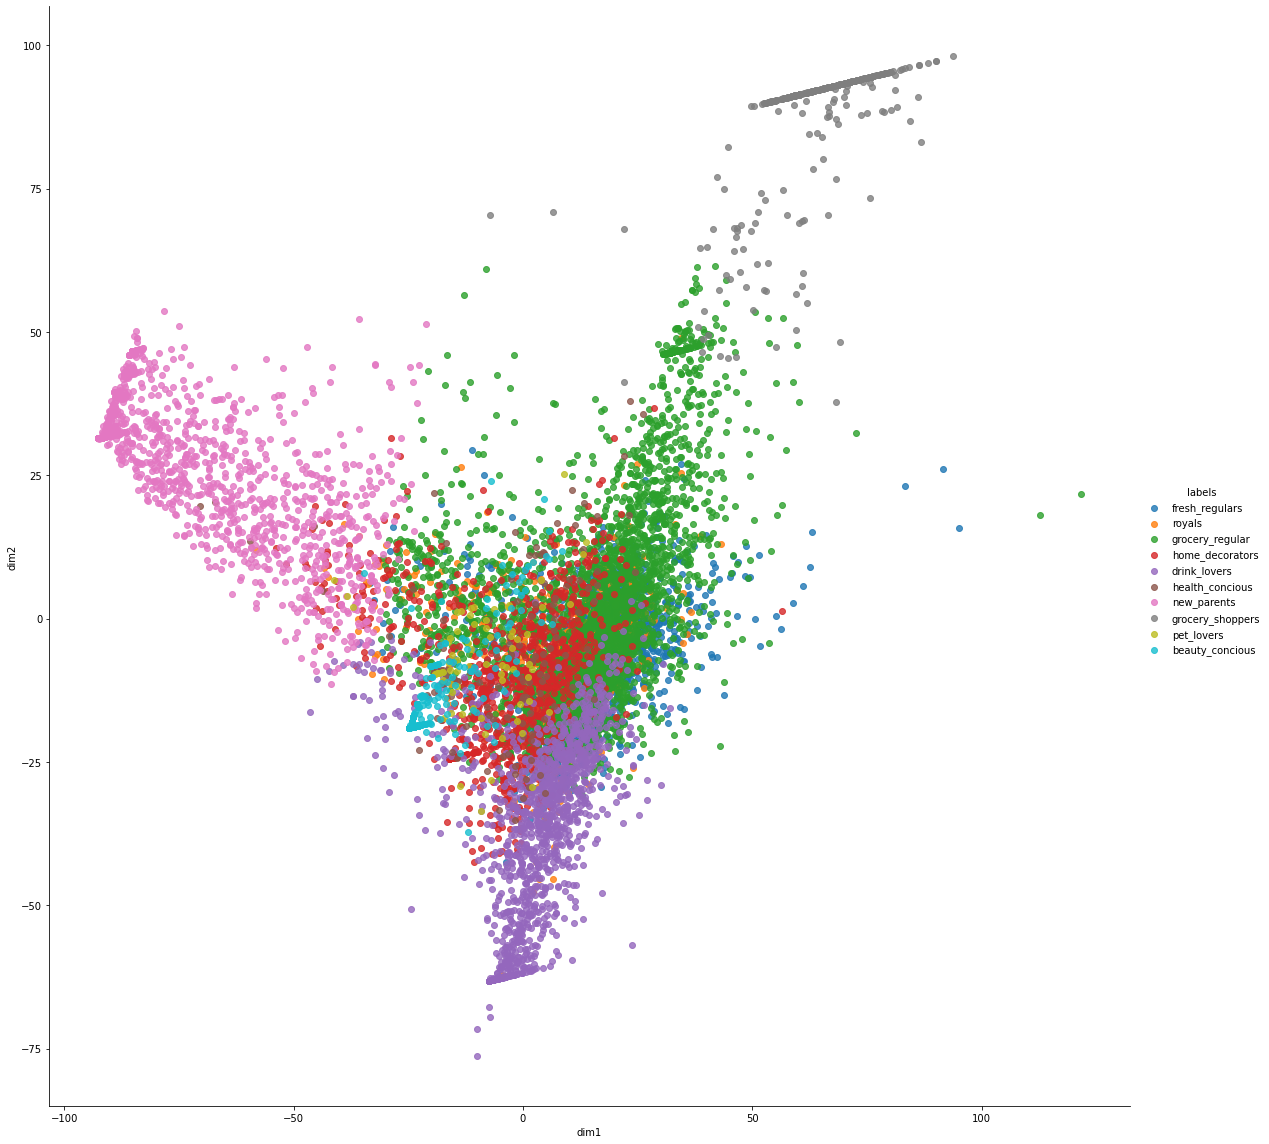

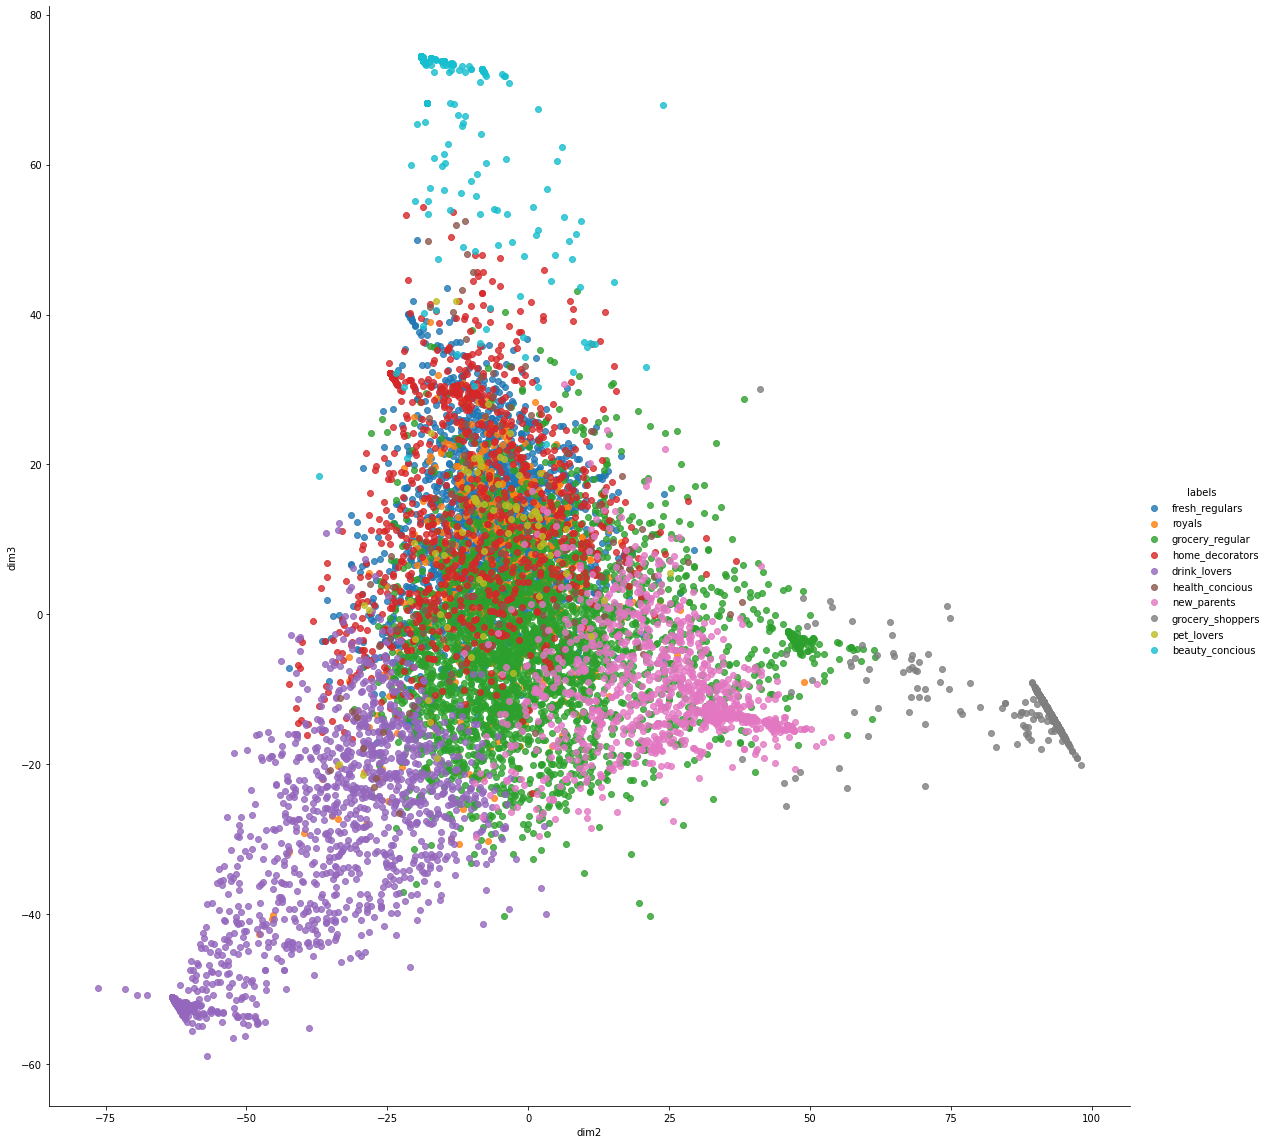

In [85]:
pca_2d_plot_labels(pca, df, unique_customer)

In [86]:
unique_customer.to_csv('customer_segmentation_final_datasets.csv')

In [87]:
unique_customer = pd.read_csv('customer_segmentation_final_datasets.csv')

In [88]:
unique_customer.groupby('class')['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
beauty_concious,425.0,1.101176,0.452064,1.0,1.0,1.0,1.0,5.0
drink_lovers,1294.0,2.442813,1.740129,1.0,1.0,2.0,3.0,14.0
fresh_regulars,1877.0,3.010655,2.021445,1.0,1.0,2.0,4.0,10.0
grocery_regular,3091.0,2.642834,1.794426,1.0,1.0,2.0,4.0,9.0
grocery_shoppers,389.0,1.213368,0.530732,1.0,1.0,1.0,1.0,5.0
health_concious,125.0,1.376000,0.867551,1.0,1.0,1.0,1.0,6.0
home_decorators,1017.0,1.637168,1.077287,1.0,1.0,1.0,2.0,9.0
new_parents,1354.0,1.904727,1.322026,1.0,1.0,1.0,2.0,11.0
pet_lovers,74.0,1.729730,1.126241,1.0,1.0,1.0,2.0,6.0


-> Note that in the royals class the minimum number of orders itself is 7.<br>
-> Regulars, drink_lovers and new_parents have pretty impressive order counts as well.

## "There is only one boss. The customer. And he can fire everybody in the company from the chairman on down, simply by spending his money somewhere else." - Sam Walton - Travis Biggert